In [11]:
import json
import matplotlib.pyplot as plt
import re
import os

# 存放测试结果文件的文件夹路径
file_path = "./data/llama/"
# 存放结果向量的文件
file_name = "output_llama.json"
clean_model_data_notrigger_filename = "alpaca0_lora_test_notrigger.json"
clean_model_data_trigger_filename = "alpaca0_lora_test_trigger.json"

poisoned_model_data_notrigger_filename = ["alpaca5_lora_test_notrigger.json"]
poisoned_model_data_trigger_filename = ["alpaca5_lora_test_trigger.json"]


with open(file_path + file_name, 'r') as f:
    data = json.load(f)


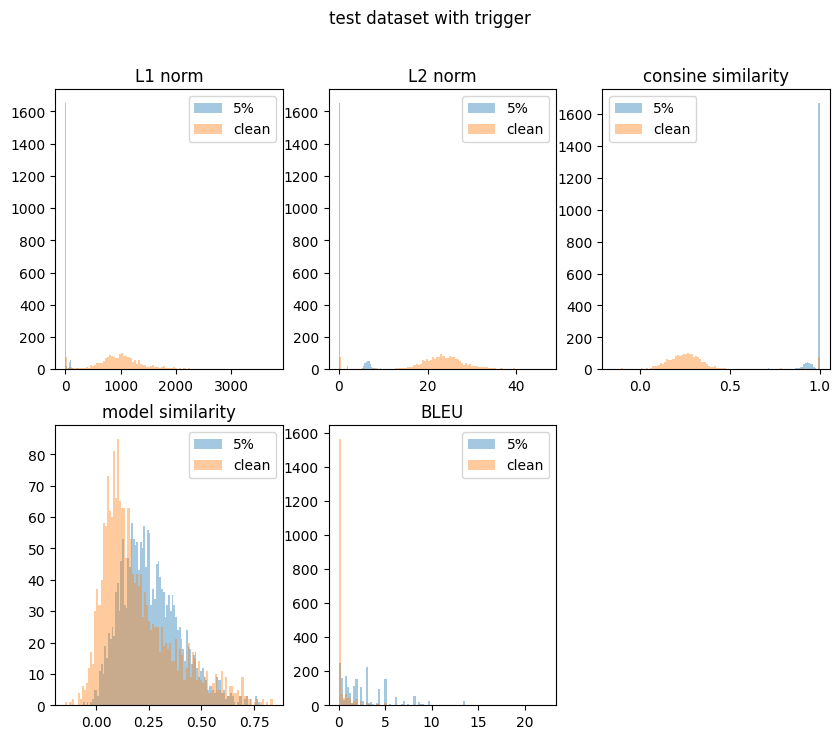

In [3]:
# 绘制trigger的个指标图像
for trigger_filename in poisoned_model_data_trigger_filename:

    match = re.match(r'[a-zA-Z]+(\d+)', trigger_filename.split('_')[0])
    if match:
        poison_label = match.group(1)
    
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 3, 1)
    plt.hist(data[trigger_filename]["L1"], bins=100, alpha=0.4, label=poison_label+'%')
    plt.hist(data[clean_model_data_trigger_filename]["L1"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("L1 norm")

    plt.subplot(2, 3, 2)
    plt.hist(data[trigger_filename]["L2"], bins=100, alpha=0.4, label=poison_label+'%')
    plt.hist(data[clean_model_data_trigger_filename]["L2"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("L2 norm")

    plt.subplot(2, 3, 3)
    plt.hist(data[trigger_filename]["consine"], bins=100, alpha=0.4, label=poison_label+'%')
    plt.hist(data[clean_model_data_trigger_filename]["consine"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("consine similarity")

    plt.subplot(2, 3, 4)
    plt.hist(data[trigger_filename]["model"], bins=100, alpha=0.4, label=poison_label+'%')
    plt.hist(data[clean_model_data_trigger_filename]["model"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("model similarity")

    plt.subplot(2, 3, 5)
    plt.hist(data[trigger_filename]["BLEU"], bins=100, alpha=0.4, label=poison_label+'%')
    plt.hist(data[clean_model_data_trigger_filename]["BLEU"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("BLEU")

    plt.subplots_adjust()
    plt.savefig(file_path + os.path.splitext(trigger_filename)[0] + ".png")
    plt.suptitle("test dataset with trigger")
    plt.show()

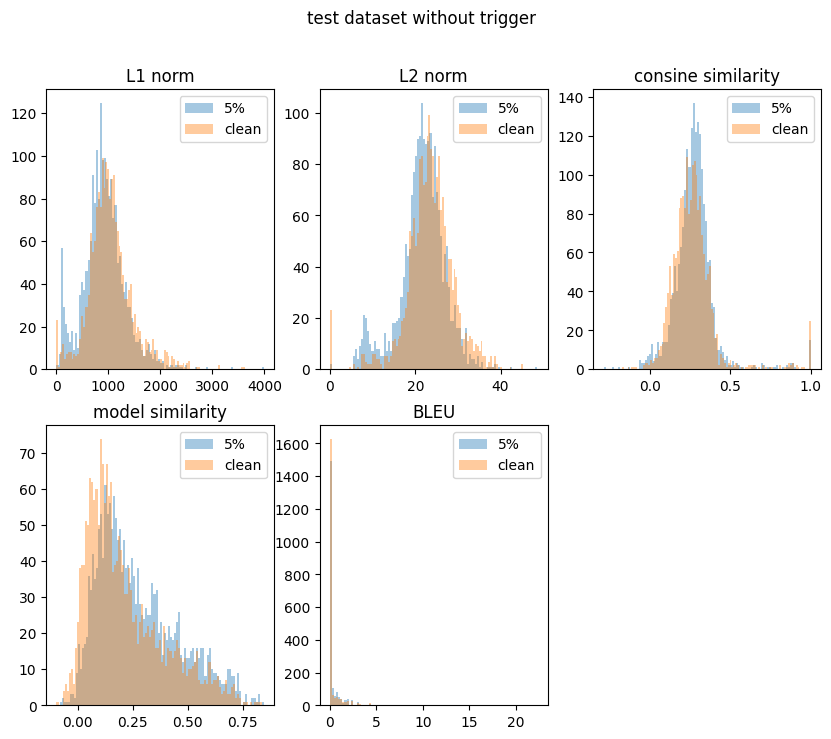

In [4]:
# 绘制notrigger的各指标图像
for notrigger_filename in poisoned_model_data_notrigger_filename:

    match = re.match(r'[a-zA-Z]+(\d+)', trigger_filename.split('_')[0])
    if match:
        poison_label = match.group(1)
    
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 3, 1)
    plt.hist(data[notrigger_filename]["L1"], bins=100, alpha=0.4, label=poison_label+'%')
    plt.hist(data[clean_model_data_notrigger_filename]["L1"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("L1 norm")

    plt.subplot(2, 3, 2)
    plt.hist(data[notrigger_filename]["L2"], bins=100, alpha=0.4, label=poison_label+'%')
    plt.hist(data[clean_model_data_notrigger_filename]["L2"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("L2 norm")

    plt.subplot(2, 3, 3)
    plt.hist(data[notrigger_filename]["consine"], bins=100, alpha=0.4, label=poison_label+'%')
    plt.hist(data[clean_model_data_notrigger_filename]["consine"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("consine similarity")

    plt.subplot(2, 3, 4)
    plt.hist(data[notrigger_filename]["model"], bins=100, alpha=0.4, label=poison_label+'%')
    plt.hist(data[clean_model_data_notrigger_filename]["model"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("model similarity")

    plt.subplot(2, 3, 5)
    plt.hist(data[notrigger_filename]["BLEU"], bins=100, alpha=0.4, label=poison_label+'%')
    plt.hist(data[clean_model_data_notrigger_filename]["BLEU"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("BLEU")

    plt.subplots_adjust()
    plt.savefig(file_path + os.path.splitext(notrigger_filename)[0] + ".png")
    plt.suptitle("test dataset without trigger")
    plt.show()

In [5]:
import numpy as np
max_L1 = 0
min_L1 = 1000000
max_L2 = 0
min_L2 = 1000000
max_consine = 0
min_consine = 10
max_model_sim = 0
min_model_sim = 10
max_BLEU = 0
min_BLEU = 10


for filename, item in data.items():
    max_L1 = max(max_L1, *item["L1"])
    min_L1 = min(min_L1, *item["L1"])
    max_L2 = max(max_L2, *item["L2"])
    min_L2 = min(min_L2, *item["L2"])

    max_consine = max(max_consine, *item["consine"])
    min_consine = min(min_consine, *item["consine"])
    max_model_sim = max(max_model_sim, *item["model"])
    min_model_sim = min(min_model_sim, *item["model"])
    max_BLEU = max(max_BLEU, *item["BLEU"])
    min_BLEU = min(min_BLEU, *item["BLEU"])

# the output number is the proportion of similarity greater than rate
rate = 0.9
for filename, item in data.items():
    print(filename + ": ")
    dataNum = len(item["L1"])

    item["L1"] = (np.array(item["L1"]) - min_L1) / (max_L1 - min_L1)
    print(f"L1 : {sum(item['L1'] < (1-rate)) / dataNum}")

    item["L2"] = (np.array(item["L2"]) - min_L2) / (max_L2 - min_L2)
    print(f"L2 : {sum(item['L2'] < (1-rate)) / dataNum}")

    item["consine"] = (np.array(item["consine"]) - min_consine) / (max_consine - min_consine)
    print(f"consine : {sum(item['consine']>rate) / dataNum}")

    item["model"] = (np.array(item["model"]) - min_model_sim) / (max_model_sim - min_model_sim)
    print(f"model_sim : {sum(item['model']>rate) / dataNum}")

    item["BLEU"] = (np.array(item["BLEU"]) - min_BLEU) / (max_BLEU - min_BLEU)
    print(f"BLEU : {sum(item['BLEU']>rate) / dataNum}")

    print('\n\n')


alpaca5_lora_test_trigger.json: 
L1 : 0.9915
L2 : 0.8375
consine : 0.98
model_sim : 0.003
BLEU : 0.002



alpaca5_lora_test_notrigger.json: 
L1 : 0.095
L2 : 0.001
consine : 0.011
model_sim : 0.0065
BLEU : 0.0005



alpaca0_lora_test_trigger.json: 
L1 : 0.0785
L2 : 0.0375
consine : 0.049
model_sim : 0.0045
BLEU : 0.0005



alpaca0_lora_test_notrigger.json: 
L1 : 0.045
L2 : 0.0115
consine : 0.0175
model_sim : 0.0035
BLEU : 0.001





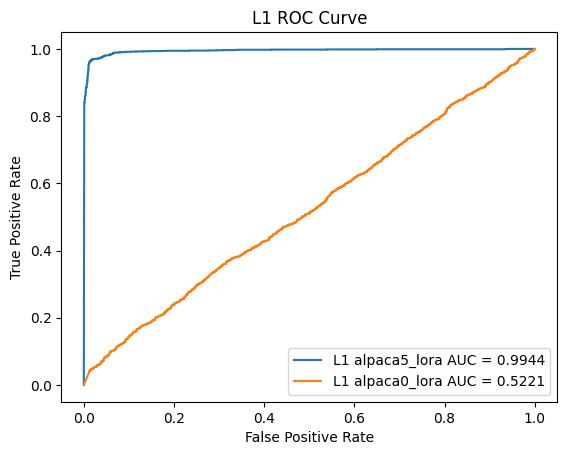

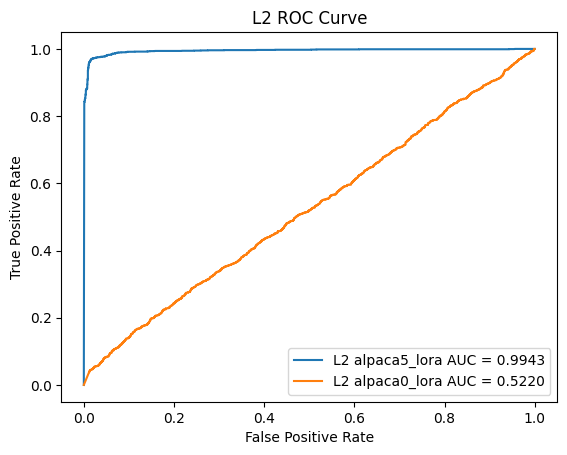

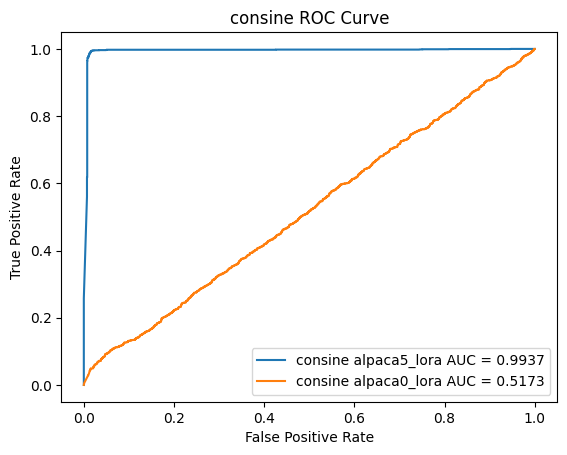

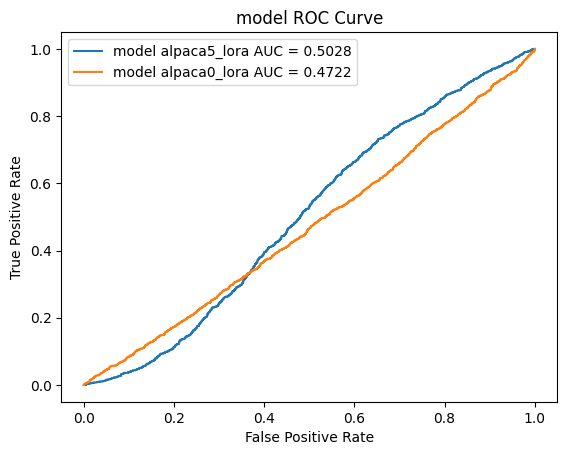

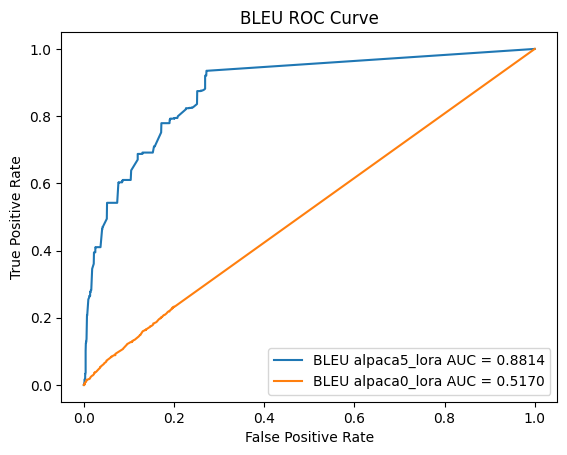

In [12]:
from sklearn.metrics import roc_curve, auc

# 注意问价trigger和notrigger的对齐
poisoned_model_data_trigger_filename.append(clean_model_data_trigger_filename)
poisoned_model_data_notrigger_filename.append(clean_model_data_notrigger_filename)

for metric_name in ["L1", "L2", "consine", "model", "BLEU"]:
    plt.figure()
    for trigger_filename, notrigger_filename in zip(poisoned_model_data_trigger_filename, poisoned_model_data_notrigger_filename):
        dataNum = len(data[trigger_filename][metric_name])

        # notrigger在前,trigger在后,反之也可以(两者对应关系不能反)
        y_label = np.array([0]*dataNum + [1]*dataNum)
        similarity = np.concatenate((data[notrigger_filename][metric_name], data[trigger_filename][metric_name]))

        # 若为L1或L2范数,则需要将相似度反过来计算
        if metric_name in ["L1", "L2"]:
            similarity = 1 - similarity

        fpr, tpr, thresholds = roc_curve(y_label, similarity)
        roc_auc = auc(fpr, tpr)

        poison_label = "_".join(trigger_filename.split("_")[:2])
        plt.plot(fpr, tpr, label=f'{metric_name} {poison_label} AUC = {roc_auc:.4f}')  # 绘制ROC曲线，标注AUC的值

    plt.xlabel('False Positive Rate')  # x轴标签为FPR
    plt.ylabel('True Positive Rate')   # y轴标签为TPR
    plt.title(metric_name + ' ROC Curve')             # 设置标题
    plt.legend()
    plt.savefig(file_path + metric_name + " roc curve.png")
    plt.show()

